# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
!pip install palmerpenguins
import numpy as np
import pandas as pd
from sys import exit
from palmerpenguins import load_penguins


In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
from plotnine import *

In [5]:
penguins = load_penguins()

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [6]:
y = penguins["bill_depth_mm"].dropna()
X = penguins[["bill_length_mm"]].dropna()
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr_fit = lr.fit(X_train, y_train)

y_pred_lr_train = lr_fit.predict(X_train)
y_pred_lr = lr_fit.predict(X_test)
y_pred1 = lr_fit.predict(X)

In [7]:
#make sure the order is right, actual value first and then predict value
r2_train_lr = r2_score(y_train, y_pred_lr_train)
r2_test_lr = r2_score(y_test, y_pred_lr)
MSE_train_lr = mean_squared_error(y_train, y_pred_lr_train)
MSE_test_lr = mean_squared_error(y_test, y_pred_lr)
df = pd.DataFrame([{'model':'Simple linear regression model', 'r2_score_train': r2_train_lr, 'r2_score_test': r2_test_lr, 'MSE_train': MSE_train_lr, 'MSE_test': MSE_test_lr}])

In [8]:
#make degree 2 column
X["x_sq"] = X["bill_length_mm"]**2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr_fit = lr.fit(X_train, y_train)

y_pred_lr_train = lr_fit.predict(X_train)
y_pred_lr = lr_fit.predict(X_test)
y_pred2 = lr_fit.predict(X)

In [9]:
r2_train_lr = r2_score(y_train, y_pred_lr_train)
r2_test_lr = r2_score(y_test, y_pred_lr)
MSE_train_lr = mean_squared_error(y_train, y_pred_lr_train)
MSE_test_lr = mean_squared_error(y_test, y_pred_lr)
df2 = pd.DataFrame([{'model':'Quadratic model', 'r2_score_train': r2_train_lr, 'r2_score_test': r2_test_lr, 'MSE_train': MSE_train_lr, 'MSE_test': MSE_test_lr}])

In [10]:
#make degree 3 column
X["X_cube"] = X["bill_length_mm"]**3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr_fit = lr.fit(X_train, y_train)

y_pred_lr_train = lr_fit.predict(X_train)
y_pred_lr = lr_fit.predict(X_test)
y_pred3 = lr_fit.predict(X)

In [11]:
r2_train_lr = r2_score(y_train, y_pred_lr_train)
r2_test_lr = r2_score(y_test, y_pred_lr)
MSE_train_lr = mean_squared_error(y_train, y_pred_lr_train)
MSE_test_lr = mean_squared_error(y_test, y_pred_lr)
df3 = pd.DataFrame([{'model':'Cubic model', 'r2_score_train': r2_train_lr, 'r2_score_test': r2_test_lr, 'MSE_train': MSE_train_lr, 'MSE_test': MSE_test_lr}])

In [12]:
#make degree 4~10 column
X["X_4"] = X["bill_length_mm"]**4
X["X_5"] = X["bill_length_mm"]**5
X["X_6"] = X["bill_length_mm"]**6
X["X_7"] = X["bill_length_mm"]**7
X["X_8"] = X["bill_length_mm"]**8
X["X_9"] = X["bill_length_mm"]**9
X["X_10"] = X["bill_length_mm"]**10

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr_fit = lr.fit(X_train, y_train)

y_pred_lr_train = lr_fit.predict(X_train)
y_pred_lr = lr_fit.predict(X_test)
y_pred10 = lr_fit.predict(X)

In [14]:
r2_train_lr = r2_score(y_train, y_pred_lr_train)
r2_test_lr = r2_score(y_test, y_pred_lr)
MSE_train_lr = mean_squared_error(y_train, y_pred_lr_train)
MSE_test_lr = mean_squared_error(y_test, y_pred_lr)
df10 = pd.DataFrame([{'model':'Degree 10 polynomial model', 'r2_score_train': r2_train_lr, 'r2_score_test': r2_test_lr, 'MSE_train': MSE_train_lr, 'MSE_test': MSE_test_lr}])

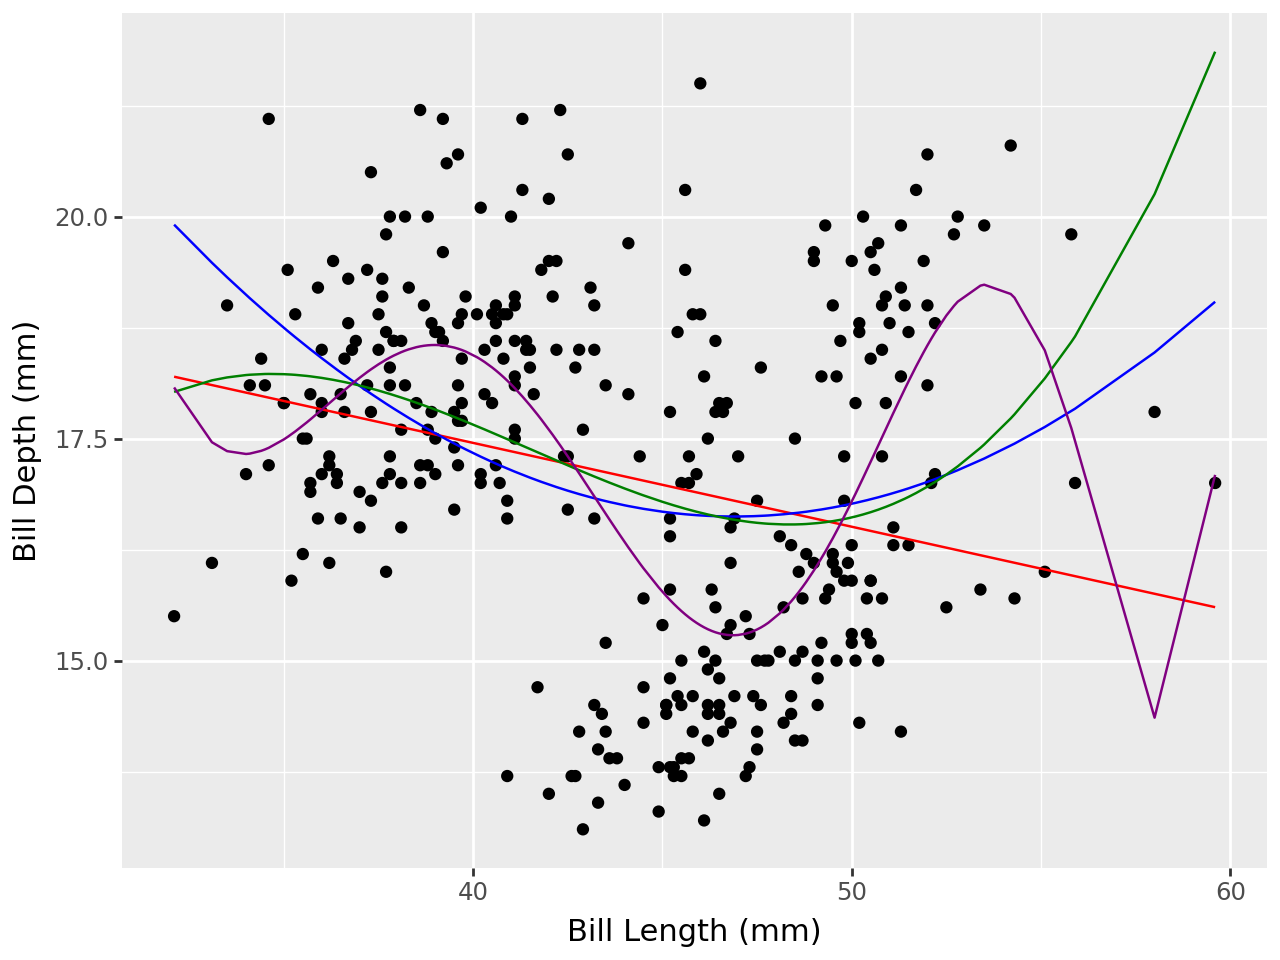

In [17]:
(ggplot(X, aes(x="bill_length_mm", y=y))
 + geom_point()
 + geom_line(aes(y=y_pred1), colour='red')
 + geom_line(aes(y=y_pred2), colour='blue')
 + geom_line(aes(y=y_pred3), colour='green')
 + geom_line(aes(y=y_pred10), colour='purple')
 + labs(x="Bill Length (mm)", y="Bill Depth (mm)")
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?  
  
  Simple Linear Regression Model has a low R square and high MSE indicate that this model does not capture the data patterns well.  

* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?  
  
  Degree 10 polynomial model has high R square on the training set but a low R square on the test set, and lower MSE on the training set compared to the test set.
   
* Which of the above models do you think fits the data best and why?  
  
  The Quadratic Model has the highest R square and lowest MSE on the test set.

In [16]:
df_combined = pd.concat([df, df2, df3, df10], axis=0)
df_combined

,model,r2_score_train,r2_score_test,MSE_train,MSE_test
0,Simple linear regression model,0.059906,-0.006519,3.934190,2.927593
0,Quadratic model,0.099174,0.156450,3.560856,3.117491
0,Cubic model,0.114529,0.195350,3.387127,3.232519
0,Degree 10 polynomial model,0.362025,0.061488,2.410767,3.931963
